# Taming Text

This exercise will explore a relatively large corpus of emails released in public during the Hillary Clinton email controversy.

In [8]:
# Importing libraries
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline  
import math

## 1. Word cloud

The first part of the exercise aims to visualise the most frequently used words in the emails exchanged. A convenient way to do this is to generate word cloud. We begin by reading the list of emails in a Pandas dataframe. 

In [375]:
file = 'hillary-clinton-emails/Emails.csv'
df = pd.read_csv(file)
df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In order to generate, the fields that we can use are 'ExtractedBodyText' and 'RawText'. According to schema described <a href="https://www.kaggle.com/kaggle/hillary-clinton-emails">here</a>, 'RawText' is the raw email text extracted from the PDF and 'ExtractedBodyText' is the attempt to only pull out the text in the body that the email sender wrote. Thus it makes more sense to use 'ExtractedBodyText' to generate the word cloud.

### Word cloud on raw text

We concatenate text from all the emails where 'ExtractedBodyText' is not 'NaN'.

In [376]:
body = df[df['ExtractedBodyText'] == df['ExtractedBodyText']]['ExtractedBodyText'].astype(str)
raw_text = ''.join(body)

Word cloud can then be generated using this unprocessed text from the body of the emails as follows.

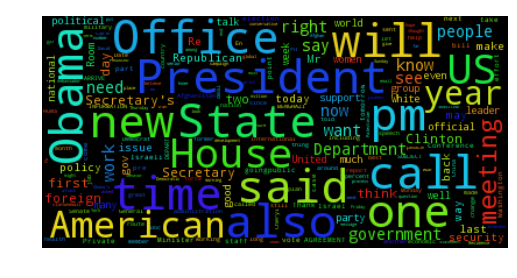

In [377]:
# Display the generated image:
wordcloud = WordCloud(max_font_size=40).generate(raw_text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word cloud on pre-processed text

In this section, we generate a similar word cloud but on pre-processed text. We use 'nltk' to perform pre-processing. We begin by producing tokens. <b>Tokenization</b> involves splitting the raw text into words and entities. 

In [378]:
# Tokenization
import nltk

tokens = nltk.word_tokenize(raw_text)
text = nltk.Text(tokens)

The next step is <b>Stop Words Removal</b>. This involves discarding frequently occuring words such as articles, prepositions etc which do not add any value for anaylsis.

In [379]:
# Stop words removal
#nltk.download("stopwords")
#nltk.download("wordnet")
from nltk.corpus import stopwords
stops = set(stopwords.words('english')).union(set(("n't","pm")))
filtered_text = [word for word in text if word.lower() not in stops]

The next step in pre-processing is lemmatization which maps several inflected forms of the word to a single word.

In [380]:
# Lemmatization
wnl = nltk.WordNetLemmatizer()
lemma_text = [wnl.lemmatize(t) for t in filtered_text]
processed_text = ' '.join(lemma_text)

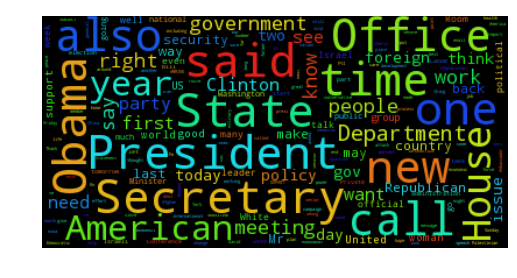

In [381]:
# Display the wordcloud
wordcloud = WordCloud(max_font_size=40).generate(processed_text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Based on observing the two word clouds above, it is clear that pre-processing is necessary in order to analyse the important words in a given text. Without pre-processing, it can be noted that a number of trivial words such as 'will', 'pm' will feature in the word cloud. With pre-processing, we can generate a word cloud which is representative of the text with words such as 'state', 'secretary', 'president' dominating the email exchanges.

## 3. Topic Modeling 

In this section, we run topic modeling over the corpus in order to determine the important content in the corpus. The library 'gensim' is used to perform this task.

In [382]:
from gensim import corpora, models

We begin by pre-processing the text. Pre-processing involves tokenization, removal of stop words,

In [384]:
# Removing numbers
import re
body = [re.sub(r'\d+', '', t) for t in body]

In [353]:
# Tokenization
tokens = [nltk.word_tokenize(doc) for doc in body]
emails = nltk.Text(tokens)

In [364]:
# Stop words removal
# [TODO: use regular expression to remove punctuation]
extra_stop = set(("fw","pm","n't","''", ",",":","...",".",";","<",">","@","[","]","(",")","-","--","//","``","h","\'s","#","?","\'","%","!"))
stops = set(stopwords.words('english')).union(extra_stop)
#filtered_text = [word for word in text if str(word).lower() not in stops]
filtered_text = [[word for word in email if str(word).lower() not in stops] for email in emails]

We then discard words which occur only once, since these words do not play major role in topic modeling.

In [365]:
# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in filtered_text:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in filtered_text]

For this task, we consider text in each email as a single document. Since emails may involve very short sentenences, it makes sense to discard such extremely short emails.

In [366]:
min_length = 10
long_texts = [text for text in texts if len(text)>=10]

We then build a dictionary of all the words occuring in all the emails. A vector representation of each document is then generated.

In [367]:
dictionary = corpora.Dictionary(long_texts)

In [368]:
corpus = [dictionary.doc2bow(long_text) for long_text in long_texts]

At this stage, dictionary contains the list of all words, each word with an unique integer id. 'corpus' contains for each document a bag of words representation (the number of occurrences of each word).

We vary the parameter 'number of topics' and try to determine the best value for it based on the topics returned. Based on the results, we believe '__' is an appropriate choice for the number of topics, since including more topics results in the same words being repeated across different topics.

In [387]:
num_topics = 5
model = models.LdaModel(corpus, num_topics, id2word=dictionary)
pprint(model.print_topics())

[(0,
  '0.005*"said" + 0.005*"Obama" + 0.004*"—" + 0.004*"would" + 0.004*"one" + '
  '0.003*"B" + 0.003*"Senate" + 0.003*"know" + 0.003*"like" + '
  '0.003*"American"'),
 (1,
  '0.005*"Israel" + 0.005*"U.S." + 0.004*"said" + 0.004*"would" + 0.003*"•" + '
  '0.003*"people" + 0.003*"American" + 0.003*"Department" + 0.003*"State" + '
  '0.002*"—"'),
 (2,
  '0.006*"would" + 0.006*"Obama" + 0.003*"one" + 0.003*"people" + 0.003*"new" '
  '+ 0.003*"could" + 0.003*"said" + 0.003*"American" + 0.003*"also" + '
  '0.003*"time"'),
 (3,
  '0.012*"Secretary" + 0.008*"Office" + 0.007*"State" + 0.005*"Department" + '
  '0.005*"Room" + 0.005*"MEETING" + 0.004*"route" + 0.004*"ARRIVE" + '
  '0.004*"DEPART" + 0.004*"would"'),
 (4,
  '0.004*"said" + 0.004*"call" + 0.004*"would" + 0.004*"w" + 0.003*"B" + '
  '0.003*"one" + 0.003*"Mr." + 0.003*"State" + 0.003*"Secretary" + '
  '0.003*"U.S."')]


## Communities

In this section, we attempt to determine the communities present in the email corpus. 

In [55]:
import community
import networkx as nx
import matplotlib.pyplot as plt

We start by building a communication graph between senders and recievers of each email. In order to accomplish this, we use the files 'Emails.csv' (SenderPersonId) and 'EmailReceivers.csv' (PersonId) and perform an inner join on the 'Id' attribute.

In [36]:
df1 = pd.read_csv('hillary-clinton-emails/Emails.csv', index_col='Id')
df1 = df1[df1['SenderPersonId']==df1['SenderPersonId']]

In [49]:
df2 = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv', index_col='Id')
df_network = pd.concat([df1, df2], axis=1, join="inner")
df_network[['SenderPersonId', 'PersonId']].head()

,SenderPersonId,PersonId
Id,,
1,87.0,80
3,32.0,228
4,32.0,80
5,80.0,80
6,80.0,81


The list of values of ('SenderPersonId','PersonId') will form the edge of the graph.

In [52]:
edges = list(zip(df_network['SenderPersonId'],df_network['PersonId']))
G = nx.Graph()
G.add_edges_from(edges)

We then determine the best partition using the best_partition (using Louvain algorithm) method of community module

In [53]:
#compute the best partition
partition = community.best_partition(G)

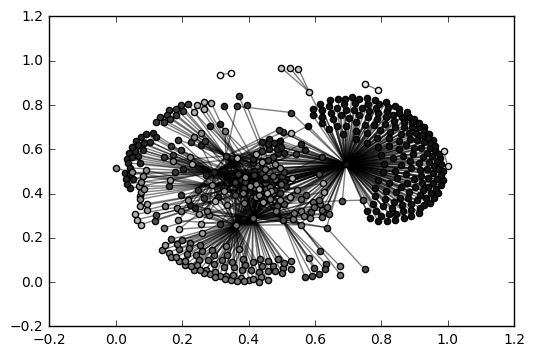

In [54]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()